In [1]:
import requests
import pandas as pd

# APIs
endpoints = {
    "launches": "https://api.spacexdata.com/v4/launches",
    "rockets": "https://api.spacexdata.com/v4/rockets",
    "payloads": "https://api.spacexdata.com/v4/payloads",
    "launchpads": "https://api.spacexdata.com/v4/launchpads"
}


for name, url in endpoints.items():
    print(f"Fetching {name}...")
    response = requests.get(url)
    data = response.json()
    df = pd.json_normalize(data)
    df.to_csv(f"{name}.csv", index=False)
    print(f"Saved {name}.csv")

print("done")


Fetching launches...
Saved launches.csv
Fetching rockets...
Saved rockets.csv
Fetching payloads...
Saved payloads.csv
Fetching launchpads...
Saved launchpads.csv
done


In [2]:
import pandas as pd
import ast

# --- Load CSV files ---
launches = pd.read_csv("launches.csv", low_memory=False)
rockets = pd.read_csv("rockets.csv")
payloads = pd.read_csv("payloads.csv")
launchpads = pd.read_csv("launchpads.csv")

# --- Safe payload ID extraction ---
def get_first_payload(x):
    try:
        payload_list = ast.literal_eval(x)
        if isinstance(payload_list, list) and len(payload_list) > 0:
            return payload_list[0]
    except:
        return None

# Handle missing or malformed payloads
launches['payload_id'] = launches['payloads'].fillna("[]").apply(get_first_payload)

# --- Merge rocket info ---
rockets = rockets.rename(columns={'id': 'rocket_id', 'name': 'rocket_name'})
launches = launches.merge(
    rockets[['rocket_id', 'rocket_name']],
    left_on='rocket',
    right_on='rocket_id',
    how='left'
)

# --- Merge payload info ---
payloads = payloads.rename(columns={'id': 'payload_id_ref'})
launches = launches.merge(
    payloads[['payload_id_ref', 'mass_kg', 'orbit']],
    left_on='payload_id',
    right_on='payload_id_ref',
    how='left'
)
launches.rename(columns={'mass_kg': 'payload_mass'}, inplace=True)

# --- Merge launchpad info ---
launchpads = launchpads.rename(columns={'id': 'launchpad_id', 'name': 'site_name'})
launches = launches.merge(
    launchpads[['launchpad_id', 'site_name', 'locality']],
    left_on='launchpad',
    right_on='launchpad_id',
    how='left'
)

# --- Final cleaned DataFrame ---
final = launches[[
    'name', 'date_utc', 'rocket_name', 'payload_mass',
    'orbit', 'site_name', 'locality', 'success'
]].rename(columns={
    'name': 'mission_name',
    'date_utc': 'launch_date',
    'locality': 'location'
})

# --- Save cleaned dataset ---
final.to_csv("spacex_cleaned.csv", index=False)
print("Final cleaned dataset saved as spacex_cleaned.csv")


Final cleaned dataset saved as spacex_cleaned.csv


In [3]:
pd.read_csv("spacex_cleaned.csv")

,mission_name,launch_date,rocket_name,payload_mass,orbit,site_name,location,success
0,FalconSat,2006-03-24T22:30:00.000Z,Falcon 1,20.0,LEO,Kwajalein Atoll,Omelek Island,False
1,DemoSat,2007-03-21T01:10:00.000Z,Falcon 1,NaN,LEO,Kwajalein Atoll,Omelek Island,False
2,Trailblazer,2008-08-03T03:34:00.000Z,Falcon 1,NaN,LEO,Kwajalein Atoll,Omelek Island,False
3,RatSat,2008-09-28T23:15:00.000Z,Falcon 1,165.0,LEO,Kwajalein Atoll,Omelek Island,True
4,RazakSat,2009-07-13T03:35:00.000Z,Falcon 1,200.0,LEO,Kwajalein Atoll,Omelek Island,True
...,...,...,...,...,...,...,...,...
200,Transporter-6,2022-12-01T00:00:00.000Z,Falcon 9,NaN,NaN,CCSFS SLC 40,Cape Canaveral,NaN
201,TTL-1,2022-12-01T00:00:00.000Z,Falcon 9,NaN,PO,VAFB SLC 4E,Vandenberg Space Force Base,NaN
202,WorldView Legion 1 & 2,2022-12-01T00:00:00.000Z,Falcon 9,NaN,SSO,CCSFS SLC 40,Cape Canaveral,NaN
203,Viasat-3 & Arcturus,2022-12-01T00:00:00.000Z,Falcon Heavy,NaN,NaN,KSC LC 39A,Cape Canaveral,NaN


In [4]:
final.columns

Index(['mission_name', 'launch_date', 'rocket_name', 'payload_mass', 'orbit',
       'site_name', 'location', 'success'],
      dtype='object')

In [5]:
final.isna().sum()

mission_name     0
launch_date      0
rocket_name      0
payload_mass    39
orbit           13
site_name        0
location         0
success         19
dtype: int64

In [6]:
final.payload_mass.dtype

dtype('float64')

In [7]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mission_name  205 non-null    object 
 1   launch_date   205 non-null    object 
 2   rocket_name   205 non-null    object 
 3   payload_mass  166 non-null    float64
 4   orbit         192 non-null    object 
 5   site_name     205 non-null    object 
 6   location      205 non-null    object 
 7   success       186 non-null    object 
dtypes: float64(1), object(7)
memory usage: 12.9+ KB


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import numpy as np


<Axes: >

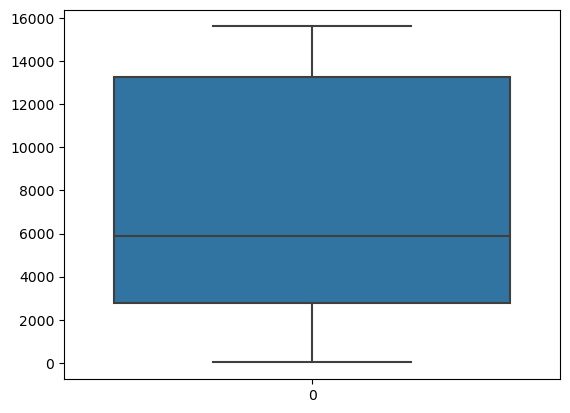

In [9]:
sns.boxplot(final.payload_mass)

In [10]:
#fill missing values for payload_mass

In [11]:
final.payload_mass=final.payload_mass.fillna(final.payload_mass.mean())

In [12]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mission_name  205 non-null    object 
 1   launch_date   205 non-null    object 
 2   rocket_name   205 non-null    object 
 3   payload_mass  205 non-null    float64
 4   orbit         192 non-null    object 
 5   site_name     205 non-null    object 
 6   location      205 non-null    object 
 7   success       186 non-null    object 
dtypes: float64(1), object(7)
memory usage: 12.9+ KB


In [13]:
# fill missing values for orbita

In [14]:
final.orbit=final.orbit.fillna(final.orbit.mode()[0])

In [15]:
final.orbit.isna().sum()

0

In [16]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mission_name  205 non-null    object 
 1   launch_date   205 non-null    object 
 2   rocket_name   205 non-null    object 
 3   payload_mass  205 non-null    float64
 4   orbit         205 non-null    object 
 5   site_name     205 non-null    object 
 6   location      205 non-null    object 
 7   success       186 non-null    object 
dtypes: float64(1), object(7)
memory usage: 12.9+ KB


In [17]:
# fill missing values for succsses column

In [18]:
final.success=final.success.fillna(final.success.mode()[0])

In [19]:
final.success.value_counts()

success
True     200
False      5
Name: count, dtype: int64

In [20]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mission_name  205 non-null    object 
 1   launch_date   205 non-null    object 
 2   rocket_name   205 non-null    object 
 3   payload_mass  205 non-null    float64
 4   orbit         205 non-null    object 
 5   site_name     205 non-null    object 
 6   location      205 non-null    object 
 7   success       205 non-null    bool   
dtypes: bool(1), float64(1), object(6)
memory usage: 11.5+ KB


# Exploratory Data Analysis (EDA)

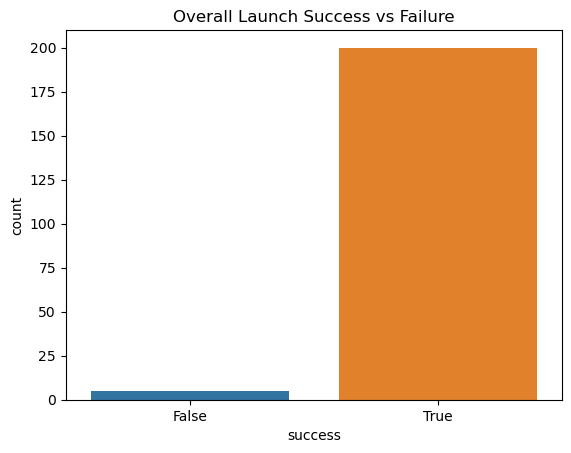

In [21]:
# Success/Failure Ka Overall Distribution

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='success', data=final)
plt.title('Overall Launch Success vs Failure')
plt.show()

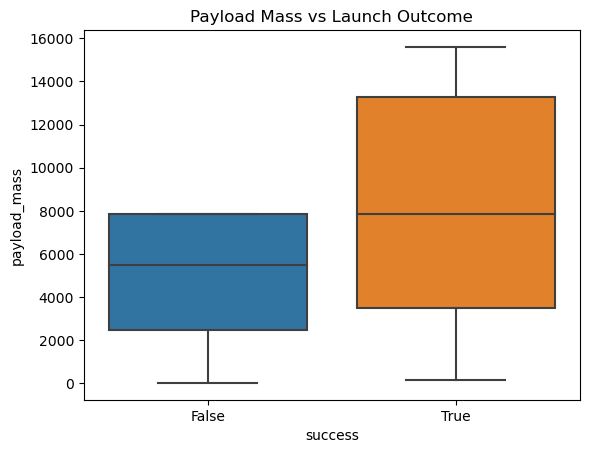

In [22]:
# Payload Mass vs Success

sns.boxplot(x='success', y='payload_mass', data=final)
plt.title('Payload Mass vs Launch Outcome')
plt.show()

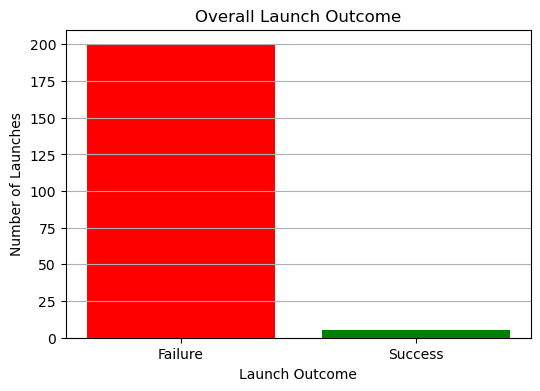

In [23]:
 #Launch Success vs Failure (Bar Chart)

import matplotlib.pyplot as plt

success_counts = final['success'].value_counts()

plt.figure(figsize=(6,4))
plt.bar(['Failure', 'Success'], success_counts, color=['red', 'green'])
plt.title('Overall Launch Outcome')
plt.xlabel('Launch Outcome')
plt.ylabel('Number of Launches')
plt.grid(axis='y')
plt.show()

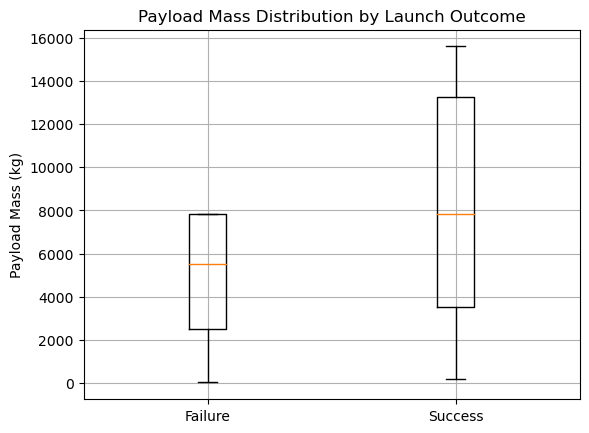

In [24]:
#Payload Mass vs Launch Outcome (Box Plot)
success = final[final['success'] == 1]['payload_mass']
failure = final[final['success'] == 0]['payload_mass']

plt.boxplot([failure, success], labels=['Failure', 'Success'])
plt.title('Payload Mass Distribution by Launch Outcome')
plt.ylabel('Payload Mass (kg)')
plt.grid(True)
plt.show()


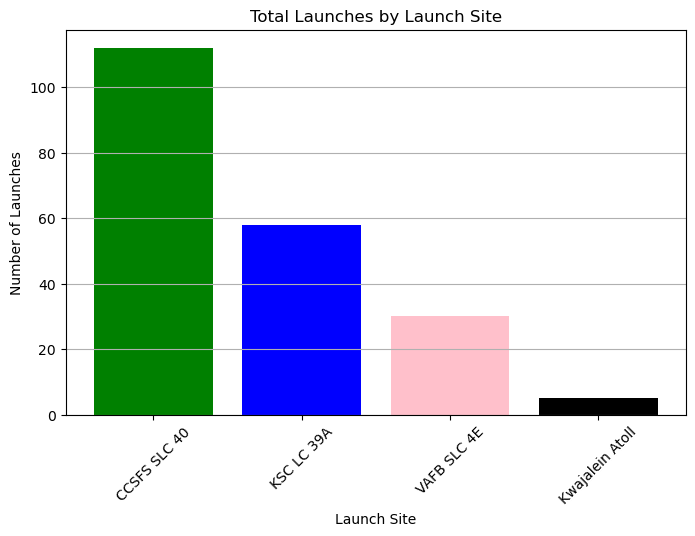

In [25]:
import matplotlib.pyplot as plt

# Total launches by site
site_counts = final['site_name'].value_counts()
c=["g","b","pink","black","m"]
plt.figure(figsize=(8,5))
plt.bar(site_counts.index, site_counts.values, color=c)
plt.title('Total Launches by Launch Site')
plt.xlabel('Launch Site')
plt.ylabel('Number of Launches')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


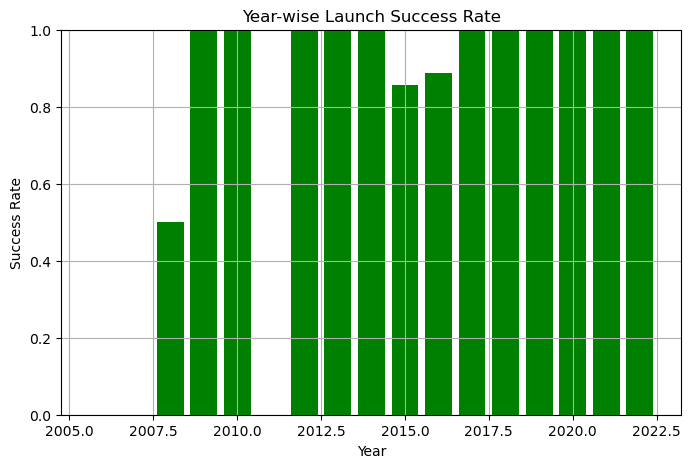

In [26]:
#Year-wise Success Rate
# Extract year from date
final['year'] = pd.to_datetime(final['launch_date']).dt.year

# Group by year and get success rate
yearly_success = final.groupby('year')['success'].mean()

plt.figure(figsize=(8,5))
plt.bar(yearly_success.index, yearly_success.values, color='green')
plt.title('Year-wise Launch Success Rate')
plt.xlabel('Year')
plt.ylabel('Success Rate')
plt.ylim(0, 1)
plt.grid(True)
plt.show()


# For Machine Learning

In [27]:
final.success=[1 if s== True else 0 for s in final.success]

In [28]:
final.success

0      0
1      0
2      0
3      1
4      1
      ..
200    1
201    1
202    1
203    1
204    1
Name: success, Length: 205, dtype: int64

In [29]:
final_encoded=pd.get_dummies(final,dtype=int)

In [30]:
final_encoded

,payload_mass,success,year,mission_name_ABS-2A / Eutelsat 117W B,mission_name_ABS-3A / Eutelsat 115W B,mission_name_ANASIS-II,mission_name_Amos-17,mission_name_Amos-6,mission_name_ArabSat 6A,mission_name_AsiaSat 6,...,orbit_SSO,orbit_TLI,orbit_VLEO,site_name_CCSFS SLC 40,site_name_KSC LC 39A,site_name_Kwajalein Atoll,site_name_VAFB SLC 4E,location_Cape Canaveral,location_Omelek Island,location_Vandenberg Space Force Base
0,20.000000,0,2006,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,7842.388855,0,2007,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,7842.388855,0,2008,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,165.000000,1,2008,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,200.000000,1,2009,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,7842.388855,1,2022,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
201,7842.388855,1,2022,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
202,7842.388855,1,2022,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
203,7842.388855,1,2022,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0


In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [32]:

# 2. seperete input and out put 
X = final_encoded.drop('success', axis=1)
y = final_encoded['success']


In [33]:

# 3. Train-test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(random_state=42)

In [34]:
# 4. Model fit 

model.fit(X_train, y_train)



RandomForestClassifier(random_state=42)

In [35]:
# 5. Prediction karain
y_pred_train = model.predict(X_train)
pd.DataFrame({'y_train':y_train,'y_predect_train':y_pred_train})


,y_train,y_predect_train
66,1,1
111,1,1
153,1,1
96,1,1
38,1,1
...,...,...
106,1,1
14,1,1
92,1,1
179,1,1


In [36]:
y_pred_test = model.predict(X_test)
pd.DataFrame({'y_test':y_test,'y_predect_test':y_pred_test})



,y_test,y_predect_test
15,1,1
9,1,1
100,1,1
132,1,1
68,1,1
95,1,1
159,1,1
162,1,1
147,1,1
182,1,1


In [37]:
# 6. Model evaluation print karain
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score
print(f"accuracy_score: {accuracy_score(y_train, y_pred_train)}")
print(f"recall_score: {recall_score(y_train, y_pred_train)}")
print(f"precision_score: {precision_score(y_train, y_pred_train)}")
print(f"f1_score: {f1_score(y_train, y_pred_train)}")

accuracy_score: 1.0
recall_score: 1.0
precision_score: 1.0
f1_score: 1.0


In [38]:
pip install folium


Note: you may need to restart the kernel to use updated packages.


In [39]:
pip install streamlit_folium